In [100]:
import numpy as np
import pandas as pd

#지수표현식 없애기 
pd.options.display.float_format = '{:.5f}'.format
#되돌리기 ->pd.reset_option('display.float_format')

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize'] = [6, 4]
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

import matplotlib as mpl

mpl.rcParams['font.family'] = 'Pretendard'
mpl.rcParams['font.size'] = 25

mpl.rcParams['axes.unicode_minus'] = False

In [101]:
import os
data_dir = './rawdatas/'
os.listdir('./rawdatas')

['2.국민건강보험공단_진료내역정보_2022(수정).CSV',
 '3.의료기관별상세정보서비스_01_시설정보.csv',
 '건강보험심사평가원_병원급이상 진료과목별 시도별 진료비 통계_20221231.csv',
 '건강보험심사평가원_의료기관 시군구별 진료비 통계_20221231.csv',
 '건강보험심사평가원_전문병원 지정 현황_20210101.csv',
 '보건복지부_공공보건 의료기관 현황_20161231.csv',
 '시·군·구별_연간_미충족의료율_병의원__20240411154120_1레벨.csv',
 '시도별_공공의료기관_비중_20240411163247.csv',
 '인구, 가구 및 주택 – 읍면동(연도 끝자리 0, 5), 시군구(그 외 연도).csv',
 '인구_1000명당_의사수.csv',
 '전국 병의원 및 약국 현황 2023.12',
 '지역별종별_의료인력현황_의사등_2022년4분기.csv',
 '행정안전부_병원_20240302.csv']

In [102]:
docs = pd.read_csv(data_dir + '지역별종별_의료인력현황_의사등_2022년4분기.csv')
docs.head()

,시도,요양기관종별,의사계,치과의사계,한의사계,조산사,약사계,물리치료사,작업치료사,사회복지사
0,서울,소계,32704,7511,5225,11,9891,9271,1233,586
1,서울,상급종합병원,10607,256,0,0,1016,276,109,111
2,서울,종합병원,4964,143,8,0,506,414,103,120
3,서울,병원,2045,36,21,4,251,1711,453,53
4,서울,요양병원,488,3,137,0,129,836,444,181


In [103]:
pops = pd.read_csv(data_dir + '인구, 가구 및 주택 – 읍면동(연도 끝자리 0, 5), 시군구(그 외 연도).csv')
pops.head()

,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
0,전국,51692272,25835298,25856974,49939926,24866514,25073412,1752346,968784,783562,...,21773507,17212,592468,19155585,3860997,12268973,530985,2283238,211392,1162311
1,서울,9417469,4547051,4870418,9056522,4381802,4674720,360947,165249,195698,...,4098818,2423,150893,3111323,293489,1851242,110418,828773,27401,287651
2,부산,3295760,1608947,1686813,3239787,1578621,1661166,55973,30326,25647,...,1447825,762,15970,1308294,188725,898404,30256,177774,13135,100004
3,대구,2366852,1165698,1201154,2328003,1145462,1182541,38849,20236,18613,...,1010834,610,12660,834637,137208,627191,8915,51403,9920,26044
4,인천,2989125,1499105,1490020,2878924,1438975,1439949,110201,60130,50071,...,1212731,901,35424,1087837,93320,717820,29807,238189,8701,110433


- **총인구(1,000명) 대비 총 의사수**

In [104]:
docs_total = docs[docs['요양기관종별']=='소계']
docs_total = docs_total.loc[:, ['시도', '의사계']]
docs_total.head()

,시도,의사계
0,서울,32704
15,부산,8356
29,인천,5375
43,대구,6192
57,광주,3751


In [105]:
pops_total = pops.loc[:, ['행정구역별(읍면동)', '총인구 (명)']]
pops_total.head()

,행정구역별(읍면동),총인구 (명)
0,전국,51692272
1,서울,9417469
2,부산,3295760
3,대구,2366852
4,인천,2989125


In [106]:
docs_pops = pd.merge(docs_total, pops_total, left_on='시도', right_on='행정구역별(읍면동)', how='inner')
docs_pops = docs_pops.drop(labels=['행정구역별(읍면동)'], axis=1)

In [107]:
docs_pops['천명당 비'] = docs_pops['의사계'] / docs_pops['총인구 (명)'] * 1000
docs_pops

,시도,의사계,총인구 (명),천명당 비
0,서울,32704,9417469,3.47270
1,부산,8356,3295760,2.53538
2,인천,5375,2989125,1.79819
3,대구,6192,2366852,2.61613
4,광주,3751,1468972,2.55349
5,대전,3773,1473662,2.56029
6,울산,1808,1110516,1.62807
7,경기,23893,13717827,1.74175
8,강원,2778,1528037,1.81802
9,충북,2542,1624993,1.56431


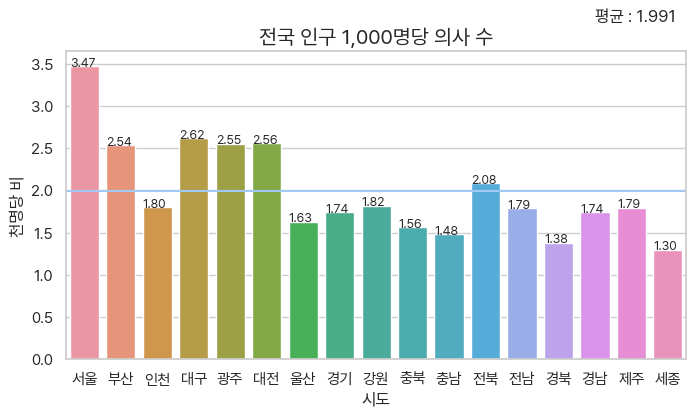

In [108]:
plt.figure(figsize=(8, 4))

grp = sns.barplot(data=docs_pops, x='시도', y='천명당 비')
plt.title('전국 인구 1,000명당 의사 수', fontsize=15)
grp.axhline(docs_pops['천명당 비'].mean())
grp.text(x=14, y=4,
         s='평균 : '+str(round(docs_pops['천명당 비'].mean(), 3)),
         fontsize=12)

for p in grp.patches:
    grp.text(x=p.get_x(), y=p.get_height(),
             s='{:.2f}'.format(round(p.get_height(), 2)),
             fontsize=9)

plt.show()

In [142]:
docs_pops.sort_values(by='천명당 비', ascending=True)

,시도,의사계,총인구 (명),천명당 비
16,세종,496,382589,1.29643
13,경북,3615,2620373,1.37957
10,충남,3242,2193214,1.47820
9,충북,2542,1624993,1.56431
6,울산,1808,1110516,1.62807
7,경기,23893,13717827,1.74175
14,경남,5716,3280829,1.74224
12,전남,3172,1771431,1.79064
15,제주,1214,676375,1.79486
2,인천,5375,2989125,1.79819


---

- **공공 의료기관 현황**

In [110]:
pub_hos = pd.read_csv(data_dir + '보건복지부_공공보건 의료기관 현황_20161231.csv', encoding='cp949')
pub_hos.head(1)

,연번,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
0,1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN


In [111]:
'강원도 춘천시 충열로 142번길 24-16'.split(sep=' ')[0]

'강원도'

In [112]:
pub_hos['시군구'] = pub_hos['주소'].apply(lambda x: x.split(sep=' ')[0])

In [113]:
pub_hos['시군구'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [114]:
pub_hos_geonames = {
    '강원':['강원도'], '경기':['경기도', '경기'], '경남':['경남', '경상남도', '창원시'],
    '경북':['경상북도', '경산시', '경북'], '인천':['인천광역시'], '대구':['대구광역시'],
    '전남':['전라남도', '전남'], '대전':['대전광역시', '대전시'], '광주':['광주광역시'],
    '제주':['제주특별자치도'], '부산':['부산광역시', '부산특별시'],
    '전북':['전라북도', '전북'], '충북':['충북', '충청북도'], '서울':['서울특별시', '서울', '서울시'],
    '충남':['충청남도', '충남', '천안시'], '울산':['울산광역시']
    }

def convert_geoname(geoname):
    for key, value in pub_hos_geonames.items():
        if geoname in value:
            return key

In [115]:
pub_hos['시군구'] = pub_hos['시군구'].apply(convert_geoname)

In [116]:
# 지역별 공공의료기관 수
pub_hos_count = pd.DataFrame(pub_hos.groupby(by='시군구')['병원 명'].count())
pub_hos_count.columns = ['병원수']

# 지역별 병상 수
pub_bed_count = pd.DataFrame(pub_hos.groupby(by='시군구')['병상수'].sum())

pub_hos_and_bed = pub_hos_count.join(pub_bed_count)
pub_hos_and_bed = pub_hos_and_bed.reset_index()
pub_hos_and_bed

,시군구,병원수,병상수
0,강원,20,4150
1,경기,33,10315
2,경남,22,6424
3,경북,23,4650
4,광주,8,2594
5,대구,9,3710
6,대전,11,3946
7,부산,10,4080
8,서울,21,8365
9,울산,1,100


In [117]:
pub_hos_and_bed = pd.merge(left=pub_hos_and_bed, right=pops_total,
                           left_on='시군구', right_on='행정구역별(읍면동)',
                           how='left')
pub_hos_and_bed = pub_hos_and_bed.drop(labels=['행정구역별(읍면동)'], axis=1)

In [118]:
# 시각화
pub_hos_and_bed.head()

,시군구,병원수,병상수,총인구 (명)
0,강원,20,4150,1528037
1,경기,33,10315,13717827
2,경남,22,6424,3280829
3,경북,23,4650,2620373
4,광주,8,2594,1468972


In [119]:
# pub_hos_and_bed.to_csv('public_hos_and_beds.csv', encoding='cp949')

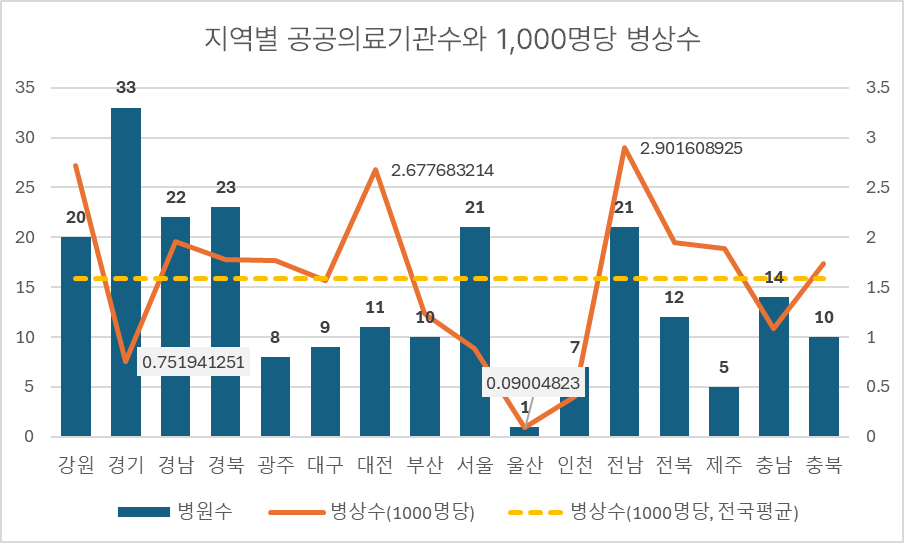

In [120]:
# 시도별 공공의료기관 비중


---

- **진료비 통계**

In [121]:
# '건강보험심사평가원_병원급이상 진료과목별 시도별 진료비 통계_20221231.csv' 분석하기
expense = pd.read_csv(data_dir + '건강보험심사평가원_병원급이상 진료과목별 시도별 진료비 통계_20221231.csv', encoding='cp949')
expense.head()

,진료년도,시도,진료과목,환자수,명세서청구건수,입내원일수,요양급여비용총액,보험자부담금
0,2022,서울,일반의,379,397,1670,800980250,695018940
1,2022,서울,내과,1694777,4154021,5178893,1415551224940,1170784318750
2,2022,서울,신경과,346406,546725,690632,120409624170,83413398960
3,2022,서울,정신건강의학과,144236,287461,367490,42865094540,28604695570
4,2022,서울,외과,278225,528446,826344,335919641930,290429449090


&emsp;&emsp;- 진료 과목별

In [122]:
# 진료과목별
expense_catsum = expense.groupby(by='진료과목').sum().iloc[:, 1:]
expense_catsum.head()

,환자수,명세서청구건수,입내원일수,요양급여비용총액,보험자부담금
진료과목,,,,,
가정의학과,558314,852782,2160941,177728032300,130435881460
결핵과,459,712,4506,645392010,585068950
구강내과,25332,40036,39990,2456118550,1494051270
구강병리과,8,8,8,3572850,2479450
구강악안면외과,126887,202548,208423,19516361870,12862891290


In [123]:
expense_catsum['환자수대비총액'] = expense_catsum['요양급여비용총액'] / expense_catsum['환자수']

In [124]:
# 환자수, 총액, 환자수대비 총액 순 top 20
expense_catsum_top20 = pd.DataFrame(data=expense_catsum.sort_values(by='환자수', ascending=False).index[:20])
expense_catsum_top20.columns = ['환자수']

expense_catsum_top20['요양급여비용총액'] = expense_catsum.sort_values(by='요양급여비용총액', ascending=False).index[:20]

expense_catsum_top20

,환자수,요양급여비용총액
0,내과,내과
1,정형외과,정형외과
2,소아청소년과,외과
3,신경과,신경외과
4,산부인과,소아청소년과
5,외과,신경과
6,신경외과,산부인과
7,응급의학과,재활의학과
8,안과,심장혈관흉부외과
9,비뇨의학과,방사선종양학과


In [125]:
expense_catsum_top20 = pd.DataFrame(expense_catsum_top20['환자수'].value_counts() + expense_catsum_top20['요양급여비용총액'].value_counts())
expense_catsum_top20 = expense_catsum_top20.dropna(axis=0)
expense_catsum_top20 # 주요 진료과

,0
가정의학과,2.00000
내과,2.00000
마취통증의학과,2.00000
비뇨의학과,2.00000
산부인과,2.00000
소아청소년과,2.00000
신경과,2.00000
신경외과,2.00000
심장혈관흉부외과,2.00000
안과,2.00000


&emsp;&emsp;- 지역별 지출

In [126]:
expense_locs = expense.groupby(by='시도').sum().iloc[:, 1:]
expense_locs = expense_locs.reset_index(drop=False)

In [127]:
# 지역별 인구대비 환자수, 총지출 보기
expense_locs = pd.merge(left=expense_locs, right=pops_total,
                        left_on='시도', right_on='행정구역별(읍면동)', how='left')
expense_locs = expense_locs.drop(labels=['행정구역별(읍면동)'], axis=1)
expense_locs.head()

,시도,환자수,명세서청구건수,입내원일수,요양급여비용총액,보험자부담금,총인구 (명)
0,강원,506378,913592,1250016,223311927130,173284301830,1528037
1,경기,3980251,8035109,10696200,1833704968070,1430463551530,13717827
2,경남,1221065,2356971,3867114,593075785240,468284179790,3280829
3,경북,684926,1171709,1794986,205546891660,152857699020,2620373
4,광주,737019,1306564,2132232,330168304460,253758731460,1468972


In [128]:
expense_locs['환자_인구대비'] = expense_locs['환자수'] / expense_locs['총인구 (명)']
expense_locs['총액_인구대비'] = expense_locs['요양급여비용총액'] / expense_locs['총인구 (명)']
expense_locs.head()

,시도,환자수,명세서청구건수,입내원일수,요양급여비용총액,보험자부담금,총인구 (명),환자_인구대비,총액_인구대비
0,강원,506378,913592,1250016,223311927130,173284301830,1528037,0.33139,146143.01037
1,경기,3980251,8035109,10696200,1833704968070,1430463551530,13717827,0.29015,133673.13701
2,경남,1221065,2356971,3867114,593075785240,468284179790,3280829,0.37218,180770.09964
3,경북,684926,1171709,1794986,205546891660,152857699020,2620373,0.26138,78441.84460
4,광주,737019,1306564,2132232,330168304460,253758731460,1468972,0.50172,224761.46888


In [144]:
expense_locs.sort_values(by='명세서청구건수', ascending=True)

,시도,환자수,명세서청구건수,입내원일수,요양급여비용총액,보험자부담금,총인구 (명),환자_인구대비,총액_인구대비
9,세종,54743,98766,108517,17068761860,13019349090,382589,0.14309,44613.83328
14,제주,135714,233309,339756,48934533350,38202395050,676375,0.20065,72348.22894
16,충북,383905,700090,1061692,173013679170,134613288280,1624993,0.23625,106470.41505
10,울산,416230,808111,1238497,211652393480,167525388520,1110516,0.37481,190589.23373
0,강원,506378,913592,1250016,223311927130,173284301830,1528037,0.33139,146143.01037
15,충남,552771,1004840,1538289,248600494900,193117445360,2193214,0.25204,113349.85774
13,전북,575348,1053269,1781687,281640672410,218665525530,1774248,0.32428,158738.05263
12,전남,638181,1121791,1887945,270129011130,217716368570,1771431,0.36026,152491.97464
3,경북,684926,1171709,1794986,205546891660,152857699020,2620373,0.26138,78441.84460
6,대전,596371,1214220,1605217,269072011980,211208892170,1473662,0.40469,182587.33141


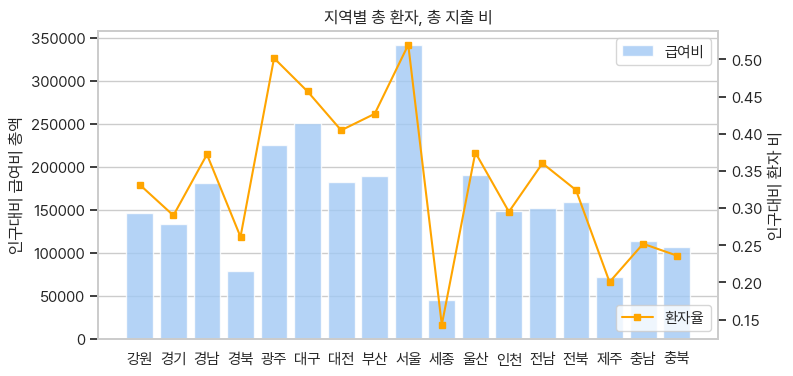

In [129]:
# 인구 대비 총환자, 총지출 보기
fig, ax1 = plt.subplots(figsize=(8,4))


ax1.bar(x=expense_locs['시도'], height=expense_locs['총액_인구대비'],
        alpha=0.8, label='급여비')
ax1.set_ylabel('인구대비 급여비 총액')
ax1.legend(loc='upper right')
plt.grid(False, axis='x')

ax2 = ax1.twinx()
ax2.plot(expense_locs['시도'], expense_locs['환자_인구대비'], '-s',
         markersize=5, color='orange', label='환자율')
ax2.set_ylabel('인구대비 환자 비')
ax2.legend(loc='lower right')

plt.title('지역별 총 환자, 총 지출 비')
plt.grid(False)

plt.show()

- **시도별 공공의료기관 비중**

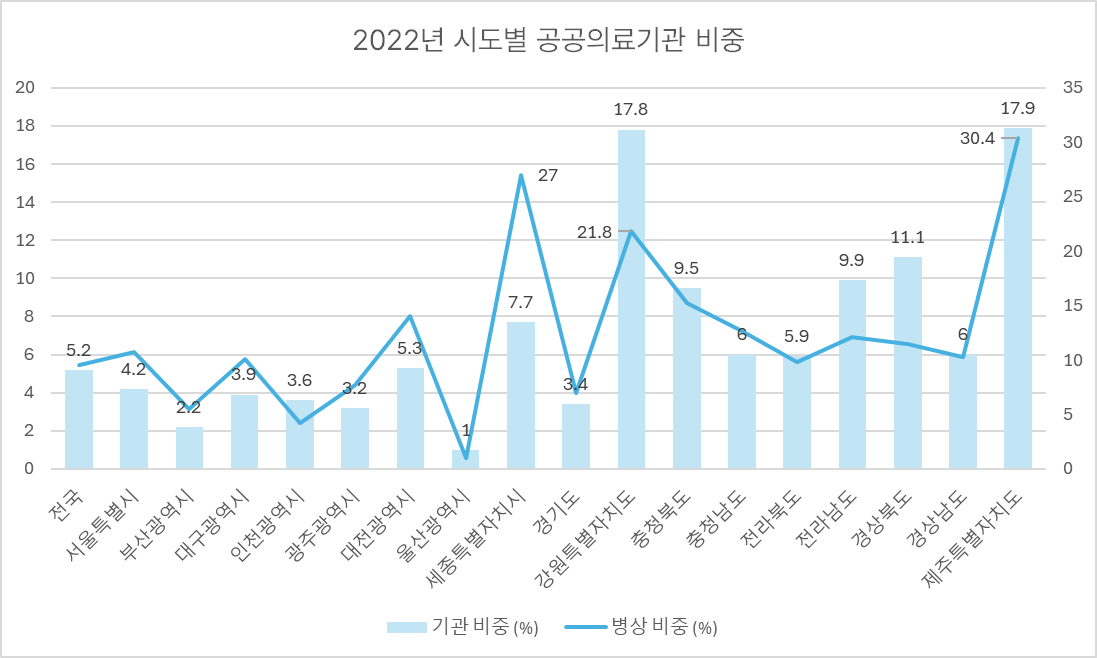

- **연간 미충족 의료율**

In [130]:
unmet = pd.read_csv(data_dir + '시·군·구별_연간_미충족의료율_병의원__20240411154120_1레벨.csv', header=1)
unmet.head()

,시군구별(1),응답자수 (명),조율 (%),조율표준오차,표준화율 (%),표준화율표준오차
0,서울특별시,21415,4.10000,0.10000,4.40000,0.20000
1,부산광역시,13420,5.50000,0.20000,5.60000,0.30000
2,대구광역시,7665,4.40000,0.30000,4.90000,0.30000
3,인천광역시,7969,7.00000,0.30000,7.20000,0.40000
4,광주광역시,4201,6.00000,0.40000,6.10000,0.40000


In [145]:
unmet.sort_values(by='표준화율 (%)', ascending=False)

,시군구별(1),응답자수 (명),조율 (%),조율표준오차,표준화율 (%),표준화율표준오차
15,경상남도,16188,8.70000,0.40000,9.30000,0.40000
10,충청북도,11589,7.70000,0.30000,8.40000,0.40000
12,전라북도,11533,7.90000,0.40000,7.80000,0.50000
9,강원특별자치도,14806,6.90000,0.30000,7.40000,0.40000
3,인천광역시,7969,7.00000,0.30000,7.20000,0.40000
6,울산광역시,3913,6.40000,0.50000,7.20000,0.60000
7,세종특별자치시,814,6.90000,1.20000,7.00000,1.20000
11,충청남도,13259,6.30000,0.30000,6.60000,0.40000
14,경상북도,19475,6.30000,0.20000,6.50000,0.30000
4,광주광역시,4201,6.00000,0.40000,6.10000,0.40000


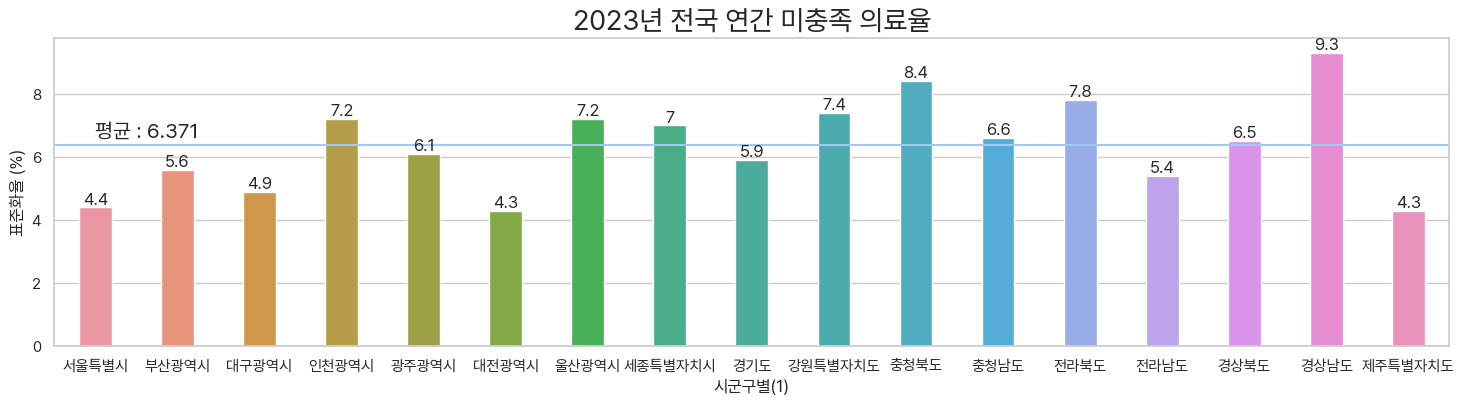

In [131]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(data=unmet, x='시군구별(1)', y='표준화율 (%)', width=0.4)
plt.title('2023년 전국 연간 미충족 의료율', fontsize=20)
plt.axhline(unmet['표준화율 (%)'].mean())
plt.text(x=0, y=unmet['표준화율 (%)'].mean()+0.25,
         s='평균 : '+str(round(unmet['표준화율 (%)'].mean(), 3)),
         fontsize=15)
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()

---

- **경상북도 구성 분석**

In [132]:
docs[docs['시도']=='경북']

,시도,요양기관종별,의사계,치과의사계,한의사계,조산사,약사계,물리치료사,작업치료사,사회복지사
190,경북,소계,3615,978,1031,1,1660,1906,263,262
191,경북,종합병원,970,28,0,0,75,178,39,39
192,경북,병원,362,7,3,0,40,305,84,13
193,경북,요양병원,347,1,145,0,103,418,140,141
194,경북,정신병원,113,0,0,0,25,3,0,65
195,경북,의원,1575,0,0,0,2,921,0,4
196,경북,치과병원,0,53,0,0,0,0,0,0
197,경북,치과의원,0,823,0,0,0,0,0,0
198,경북,조산원,0,0,0,1,0,0,0,0
199,경북,보건소,36,29,22,0,1,32,0,0


&emsp;_1) 병의원 구성_

In [133]:
hos = pd.read_csv(data_dir+'3.의료기관별상세정보서비스_01_시설정보.csv')
hos.head(1)

,암호화요양기호,요양기관명,종별코드,종별코드명,설립구분코드,설립구분코드명,시도코드,시도코드명,시군구코드,시군구코드명,...,소아중환자병상수,신생아중환자병상수,분만실병상수,수술실병상수,응급실병상수,물리치료실병상수,정신과폐쇄상급병상수,정신과폐쇄일반병상수,격리병실병상수,무균치료실병상수
0,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNDgxNzAyIzExIyQxIy...,서울스타일치과의원,51,치과의원,12,개인,110000,서울,110017,중구,...,0,0,0,0,0,0,0,0,0,0


In [134]:
hos['총 병상수'] = hos.loc[:, '일반입원실상급병상수':].sum(axis=1)

In [135]:
hos = pd.concat([hos.loc[:, :'읍면동'], hos[['총 병상수']]], axis=1)

In [136]:
hos_gb = hos[hos['시도코드명']=='경북']
hos_gb.head()

,암호화요양기호,요양기관명,종별코드,종별코드명,설립구분코드,설립구분코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,총 병상수
361,JDQ4MTYyMiM4MSMkMSMkMCMkMDMkNDgxOTYxIzMxIyQxIy...,참약사 더봄약국,81,약국,12,개인,370000,경북,370200,구미시,송정동,0
395,JDQ4MTYyMiM4MSMkMSMkMCMkOTkkMzgxMzUxIzMxIyQxIy...,의료법인 영주의료재단 명품회복병원,21,병원,11,의료법인,370000,경북,370500,영주시,가흥동,89
428,JDQ4MTYyMiM4MSMkMSMkMCMkNzIkMzgxMTkxIzQxIyQyIy...,왜관심플란트치과의원,51,치과의원,12,개인,370000,경북,370024,칠곡군,왜관읍,0
452,JDQ4MTYyMiM4MSMkMSMkMCMkMDMkNDgxOTYxIzMxIyQxIy...,새동해약국,81,약국,12,개인,370000,경북,370701,포항남구,해도동,0
560,JDQ4MTYyMiM4MSMkMSMkMCMkNzIkMzgxOTYxIzExIyQxIy...,수치과의원,51,치과의원,12,개인,370000,경북,370500,영주시,가흥동,0


In [137]:
hos_gb_count = pd.DataFrame(hos_gb['종별코드명'].value_counts())
hos_gb_count = hos_gb_count.reset_index(drop=False)
hos_gb_count.columns = ['구분', '개수']
hos_gb_count

,구분,개수
0,의원,1299
1,약국,1098
2,치과의원,697
3,한의원,620
4,보건진료소,298
5,보건지소,216
6,요양병원,107
7,병원,52
8,정신병원,26
9,보건소,22


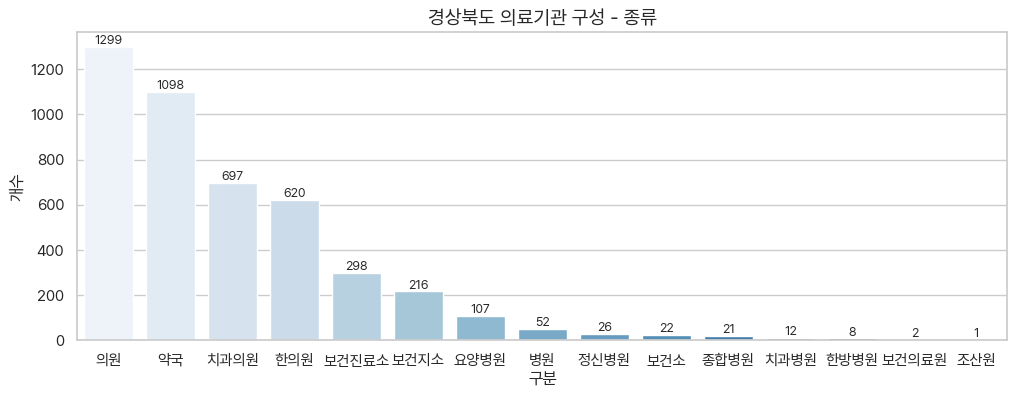

In [138]:
plt.figure(figsize=(12, 4))

grp = sns.barplot(data=hos_gb_count, x='구분', y='개수', palette='Blues')
plt.title('경상북도 의료기관 구성 - 종류', fontsize=14)
grp.bar_label(grp.containers[0], fontsize=9)

plt.show()

In [139]:
pd.DataFrame(hos_gb['설립구분코드명'].value_counts())

,설립구분코드명
개인,3735
공립,561
의료법인,132
국립,10
회사법인,10
재단법인,10
학교법인,7
사회복지법인,5
군병원,4
사단법인,3


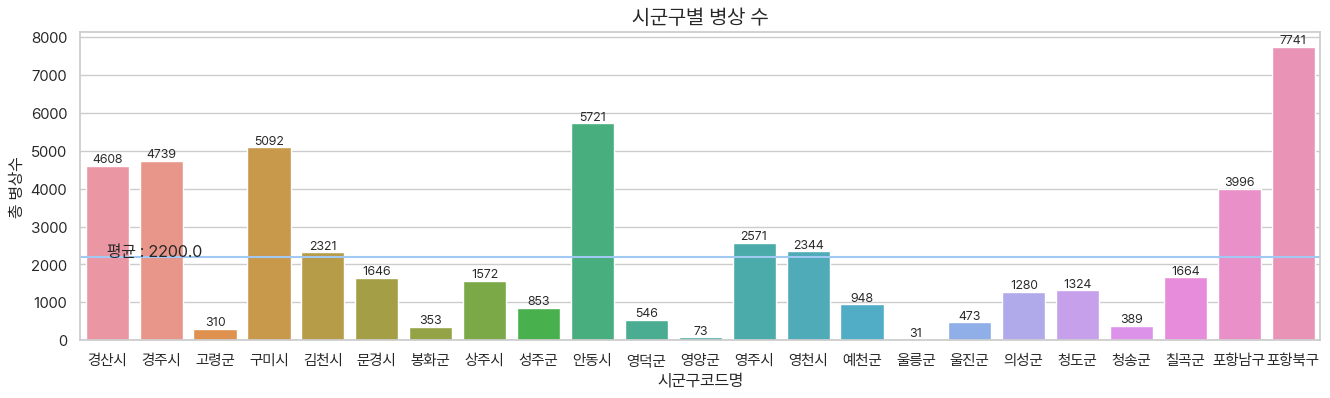

In [140]:
# 시군구별 병상 수
plt.figure(figsize=(16, 4))

beds_gb = pd.DataFrame(hos_gb.groupby(by='시군구코드명')['총 병상수'].sum())
beds_gb = beds_gb.reset_index()

grp = sns.barplot(data=beds_gb, x='시군구코드명', y='총 병상수')
grp.bar_label(grp.containers[0], fontsize=9)
plt.title('시군구별 병상 수', fontsize=15)

grp.axhline(beds_gb['총 병상수'].mean())
grp.text(x=0, y=beds_gb['총 병상수'].mean(),
         s='평균 : '+str(round(beds_gb['총 병상수'].mean(), 0)),
         fontsize=12)

plt.show()